![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)


Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics

# Simple example for self-organized criticality / emergence of power laws

This is WIP. Handle with care.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [13]:
import plot_functions.plot_settings

In [14]:
#lattice dimension
D = 2

In [15]:
#resolution
n_els = 200

In [16]:
#toppling number
#toppling = lambda Kmin, Kmax, x, y: np.random.randint(Kmin,Kmax+1,(len(x),len(y)))
#K = toppling(4,4,X,Y)
K = 4

In [17]:
axes = np.linspace(0,1,n_els)

In [18]:
X, Y = np.meshgrid(axes,axes)

In [19]:
def plot_distr(x,y,z):
    fig, ax = plt.subplots(figsize=(12,8))
    cmap=cm.jet
    cset = ax.pcolormesh(x,y,z,cmap=cmap,vmin=0,vmax=4)
    plt.colorbar(cset,shrink=0.2, aspect=5, ax=ax)
    plt.show();

In [20]:
def plot_distr_safe(fig,ax,x,y,z,base,ts,cav):
    cmap=cm.seismic
    cset = ax.pcolormesh(x,y,z,cmap=cmap,vmin=-4,vmax=4)
    #plt.colorbar(cset,ax=ax)
    fig.tight_layout()
    fig.canvas.draw()
    fig.canvas.flush_events()
    fig.savefig(base+'_%i_%i.png' %(ts,cav))
    #ax.cla()
    #fig.clf()
    #plt.close('all');

In [21]:
#random initialization
initialization = lambda x, y: np.random.randint(0,K,(len(x),len(y)))
z0 = initialization(X,Y)

In [22]:
def random_site(bot=0,top=n_els):
    return [np.random.randint(bot,top), np.random.randint(bot,top)]

In [23]:
def run_sim(z_start, bot=0,top=n_els, n_dt=10000,title='avalanche'):
    fig, ax = plt.subplots(figsize=(12,8))
    z_n = np.copy(z_start)
    avalanche = np.array([])
    rho = np.array([])
    for time in range(0,n_dt,1):
        grain_location = random_site(bot,top)
        #add a grain
        z_n_old = np.copy(z_n)
        z_n[grain_location[0],grain_location[1]] = z_n[grain_location[0],grain_location[1]] + 1
        cc = 0
        while (len(z_n[np.where(z_n >= K)]) > 0 and cc < n_els*n_els*2):
            x_top0, y_top0 = np.where(z_n >= K)
            x_top = x_top0[np.where((x_top0 > 0) & (x_top0 < n_els-1) & (y_top0 > 0) & (y_top0 < n_els-1))]
            y_top = y_top0[np.where((x_top0 > 0) & (x_top0 < n_els-1) & (y_top0 > 0) & (y_top0 < n_els-1))]
            for pos in range(len(x_top)):
                i = x_top[pos]
                j = y_top[pos]
                z_n[i,j] = z_n[i,j] - K
                z_n[i+1,j] = z_n[i+1,j] + 1
                z_n[i-1,j] = z_n[i-1,j] + 1
                z_n[i,j+1] = z_n[i,j+1] + 1
                z_n[i,j-1] = z_n[i,j-1] + 1
                #RB
                z_n[0,:] = 0
                z_n[-1,:] = 0
                z_n[:,0] = 0
                z_n[:,-1] = 0
            cc = cc + 1
            #plot_distr_safe(X,Y,z_n,'avalanche/'+title,time,cc)
        #RB
        z_n[0,:] = 0
        z_n[-1,:] = 0
        z_n[:,0] = 0
        z_n[:,-1] = 0
        if (time > (n_dt - 201) and time > 201): #record last 200 time steps
            plot_distr_safe(fig,ax,X,Y,z_n-z_n_old,'avalanche/'+title,time,0)
        avalanche = np.append(avalanche, cc)
        rho = np.append(rho,z_n[1:-2][1:-2].mean())
    plt.close(fig)
    return rho, avalanche, z_n

## Constant initial distribution 

$Z_0 = K$ everywhere followed by application of update rules shows appearance of fractal structures at several length scales (limited by lattice spacing and system size).

In [24]:
rho_in, avalanche_in, z_n_in = run_sim(z0*0+K,n_dt=1,title='random')

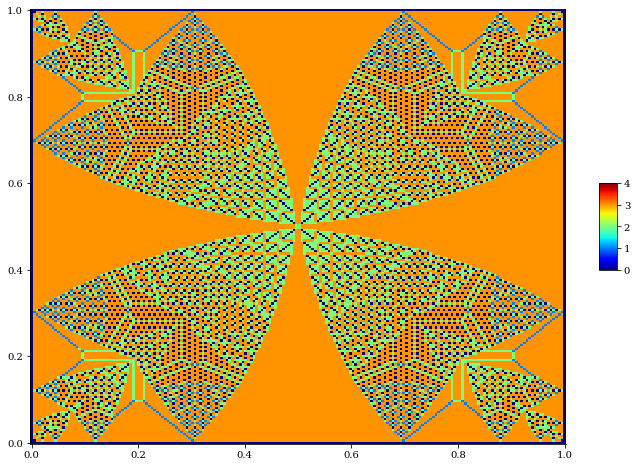

In [25]:
plot_distr(X,Y,z_n_in)

## Random initial distribution

Denisty corresponds to expected value of random field

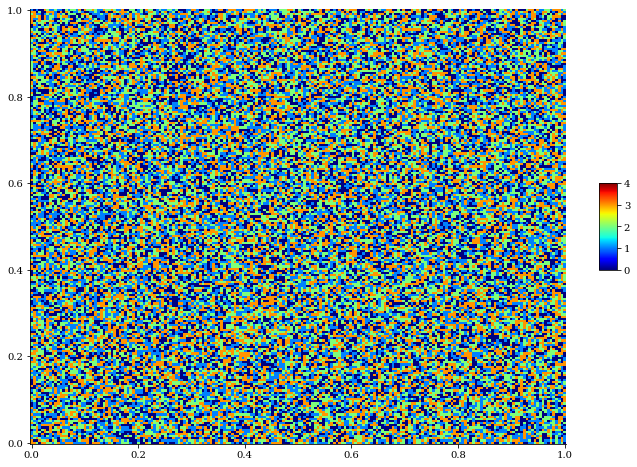

In [26]:
plot_distr(X,Y,z0)

In [27]:
z0.mean()#entspricht erwartungswert des Zufallsfelds
z0[1:-2][1:-2].mean()

1.5041494845360825

## Low-rate energy input at random position

In [28]:
rho_all, avalanche_all, z_n_all = run_sim(z0,n_dt=40000,title='random')

In [29]:
#for i in range(10):
#    rho_all, avalanche_all, z_n_all = run_sim(np.copy(z_n_all),n_dt=3000,title='random')

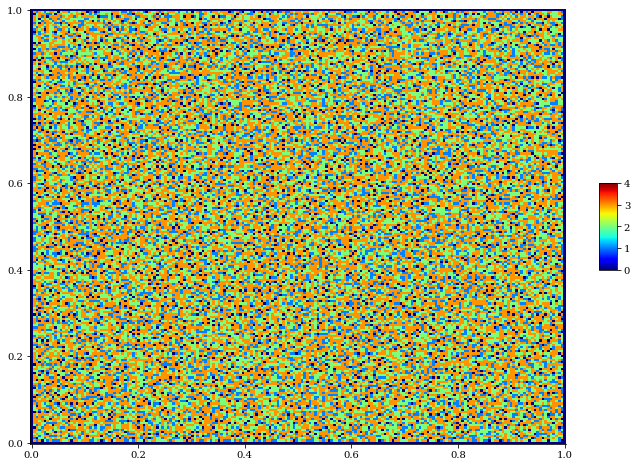

In [30]:
plot_distr(X,Y,z_n_all)

In [31]:
z_n_all[1:-2][1:-2].mean()

2.100567010309278

### Convergence of denisty, approach to steady state (SOC), avalanche histogramme

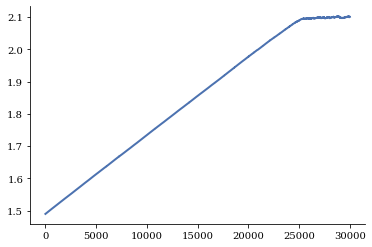

In [32]:
plt.plot(rho_all)

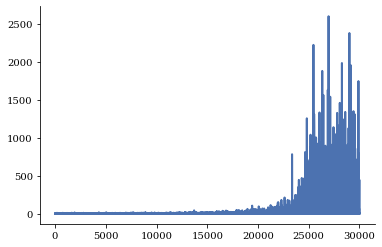

In [33]:
plt.plot(avalanche_all)
#plt.xscale('log')

In [34]:
avalanche_steady=avalanche_all[25000:]

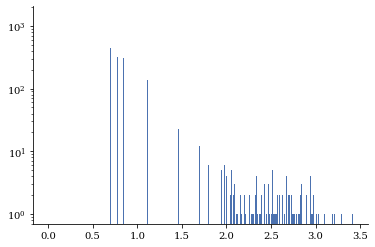

In [35]:
plt.hist(np.log10(avalanche_steady[np.where(avalanche_steady>0)]),log=True,bins=2000);

## Low-rate energy input only in central region

In [36]:
rho_center, avalanche_center, z_n_center = run_sim(z0,bot=n_els/2-5,top=n_els/2+6,n_dt=50000,title='central')

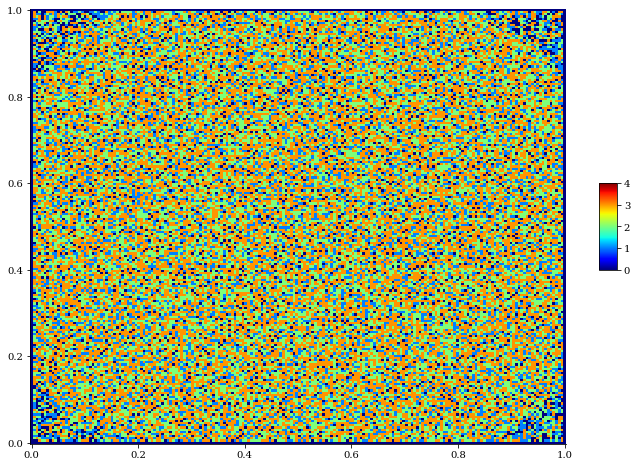

In [37]:
plot_distr(X,Y,z_n_center)

### Convergence of denisty, approach to steady state (SOC), avalanche histogramme

In [38]:
z_n_center[1:-2][1:-2].mean()

2.0805927835051548

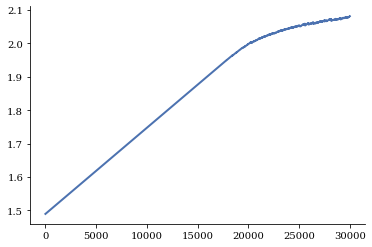

In [39]:
plt.plot(rho_center)

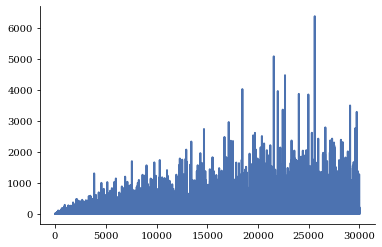

In [40]:
plt.plot(avalanche_center)
#plt.xscale('log')

In [41]:
avalanche_steady=avalanche_center[30000:]

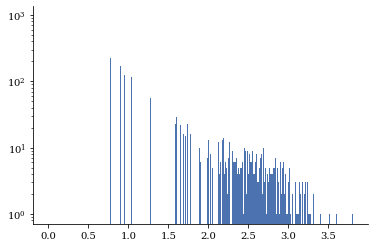

In [42]:
plt.hist(np.log10(avalanche_steady[np.where(avalanche_steady>0)]),log=True,bins=2000);